In [10]:
!pip freeze

alabaster==0.7.12
anaconda-client==1.7.2
anaconda-navigator==1.8.7
anaconda-project==0.8.2
asn1crypto==0.24.0
astroid==2.2.5
astropy==3.1.2
atomicwrites==1.3.0
attrs==19.1.0
Babel==2.6.0
backcall==0.1.0
backports.os==0.1.1
backports.shutil-get-terminal-size==1.0.0
beautifulsoup4==4.7.1
bitarray==0.8.3
bkcharts==0.2
blaze==0.11.3
bleach==3.1.0
bokeh==1.0.4
boto==2.49.0
Bottleneck==1.2.1
certifi==2019.6.16
cffi==1.12.2
chardet==3.0.4
Click==7.0
cloudpickle==0.8.0
clyent==1.2.2
colorama==0.4.1
conda==4.7.5
conda-build==3.10.5
conda-package-handling==1.3.10
conda-verify==2.0.0
contextlib2==0.5.5
cryptography==2.6.1
cycler==0.10.0
Cython==0.29.6
cytoolz==0.9.0.1
dask==1.1.4
datashape==0.5.4
decorator==4.4.0
defusedxml==0.5.0
distributed==1.26.0
docutils==0.14
entrypoints==0.3
et-xmlfile==1.0.1
fastcache==1.0.2
filelock==3.0.4
Flask==1.0.2
Flask-Cors==3.0.4
gevent==1.4.0
glob2==0.6
gmpy2==2.0.8
greenlet==0.4.15
h5py==2.9.0
heapdict==1.0.0
html5lib==1.0.1
idna==2.8
imageio==2.5.0
imagesize==1

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import bokeh as bk
from calendar import day_name
from IPython.display import display, Markdown
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
# from bokeh.tile_providers import Vendors
%matplotlib inline



In [12]:
dataset_Station = pd.read_csv('example_sprit_cut_station.csv', sep=';')

In [13]:
dataset_Station.head()

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,4,2014-09-26 13:24:57.000000,Aral Tankstelle,ARAL,Trippstadter Straße,69,67663,Kaiserslautern,\N,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET KAISERSLAUTERN PARISER STR. 167,JET,PARISER STR. 167,\N,67655,KAISERSLAUTERN,\N,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET GERMERSHEIM MUENCHENER STRASSE 12,JET,MUENCHENER STRASSE 12,\N,76726,GERMERSHEIM,\N,49.226800,8.374400


In [14]:
dataset_Station.describe()

,VERSION,LAT,LNG
count,824.000000,824.000000,824.000000
mean,131.427184,49.322226,8.191227
std,269.682766,0.254722,0.283228
min,1.000000,48.800790,7.505350
25%,1.000000,49.106052,8.106655
50%,4.000000,49.374500,8.289707
75%,22.250000,49.509410,8.404923
max,881.000000,49.799397,8.499941


In [15]:
dataset_Prices = pd.read_csv('example_sprit_cut_prices.csv', sep=';')

In [16]:
dataset_Prices.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01.000000,1
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01.000000,21
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01.000000,21


In [17]:
dataset_Prices.describe()

,E5,E10,DIESEL,CHANGED
count,2.189526e+06,2.189526e+06,2.189526e+06,2.189526e+06
mean,1.434320e+03,1.404088e+03,1.247491e+03,1.871165e+01
std,2.091502e+02,2.116844e+02,1.037774e+02,8.031150e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00
25%,1.379000e+03,1.349000e+03,1.169000e+03,2.100000e+01
50%,1.459000e+03,1.429000e+03,1.239000e+03,2.100000e+01
75%,1.529000e+03,1.499000e+03,1.324000e+03,2.100000e+01
max,9.999000e+03,9.999000e+03,1.129000e+04,6.300000e+01


In [18]:
# Removing Outliers for E5 Price 
Remov_e5negvalues=dataset_Prices[dataset_Prices['E5']<=0]

In [19]:
dataset_Prices.drop(Remov_e5negvalues.index,axis=0,inplace=True)

In [20]:
dataset_Prices.describe()

,E5,E10,DIESEL,CHANGED
count,2.154982e+06,2.154982e+06,2.154982e+06,2.154982e+06
mean,1.457313e+03,1.426538e+03,1.247815e+03,1.898873e+01
std,1.045797e+02,1.161936e+02,1.034716e+02,7.767144e+00
min,8.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00
25%,1.379000e+03,1.359000e+03,1.169000e+03,2.100000e+01
50%,1.459000e+03,1.429000e+03,1.239000e+03,2.100000e+01
75%,1.529000e+03,1.499000e+03,1.329000e+03,2.100000e+01
max,9.999000e+03,9.999000e+03,1.129000e+04,6.300000e+01


In [21]:
# Removing Outliers for E10 Price 
dataset_Prices = dataset_Prices[dataset_Prices.E10 != -1]
dataset_Prices = dataset_Prices[dataset_Prices.E10 != 0]

In [22]:
dataset_Prices.describe()

,E5,E10,DIESEL,CHANGED
count,2.151106e+06,2.151106e+06,2.151106e+06,2.151106e+06
mean,1.457079e+03,1.429111e+03,1.247577e+03,1.900277e+01
std,1.045087e+02,9.923059e+01,1.033908e+02,7.727608e+00
min,8.000000e+00,1.000000e+03,-1.000000e+00,1.000000e+00
25%,1.379000e+03,1.359000e+03,1.169000e+03,2.100000e+01
50%,1.459000e+03,1.429000e+03,1.239000e+03,2.100000e+01
75%,1.529000e+03,1.499000e+03,1.319000e+03,2.100000e+01
max,9.999000e+03,9.999000e+03,1.129000e+04,6.300000e+01


In [23]:
# Diesel prices which are extremely high prices are handled by getting rid of the rows  
dataset_Prices = dataset_Prices[dataset_Prices.DIESEL != 8888]
dataset_Prices = dataset_Prices[dataset_Prices.DIESEL != 11290]
dataset_Prices = dataset_Prices[dataset_Prices.DIESEL != 8881]
dataset_Prices = dataset_Prices[dataset_Prices.E5 != 8888]
dataset_Prices = dataset_Prices[dataset_Prices.E5 != 9999]
dataset_Prices= dataset_Prices[dataset_Prices.E10 != 8888]

In [24]:
# Removing duplicates 
dataset_Prices = dataset_Prices.drop_duplicates(subset=['STID', 'E5', 'E10', 'DIESEL', 'DATE_CHANGED'])

In [25]:
dataset_Prices.shape

(1075541, 6)

In [26]:
#### Cleaning the Outliers in the Stations_DataSet

In [27]:
dataset_Station.describe()

,VERSION,LAT,LNG
count,824.000000,824.000000,824.000000
mean,131.427184,49.322226,8.191227
std,269.682766,0.254722,0.283228
min,1.000000,48.800790,7.505350
25%,1.000000,49.106052,8.106655
50%,4.000000,49.374500,8.289707
75%,22.250000,49.509410,8.404923
max,881.000000,49.799397,8.499941


In [28]:
# Deleting the inactive station
dataset_Station = dataset_Station[dataset_Station.ID != '82e92aca-b1ec-4bcf-3ab5-f192910c2716']

In [29]:
dataset_Station['POST_CODE'].replace(to_replace=['\\N'],value='null',inplace=True)

In [30]:
dataset_Station.head()

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,4,2014-09-26 13:24:57.000000,Aral Tankstelle,ARAL,Trippstadter Straße,69,67663,Kaiserslautern,\N,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET KAISERSLAUTERN PARISER STR. 167,JET,PARISER STR. 167,\N,67655,KAISERSLAUTERN,\N,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET GERMERSHEIM MUENCHENER STRASSE 12,JET,MUENCHENER STRASSE 12,\N,76726,GERMERSHEIM,\N,49.226800,8.374400


In [31]:
# House_Number, Street,PUBLIC_HOLIDAY_IDENTIFIER, Version and Name has no significance in our analysis, there by deleting the column

dataset_Station.drop('HOUSE_NUMBER', axis=1, inplace=True)
dataset_Station.drop('NAME', axis=1, inplace=True)
dataset_Station.drop('STREET', axis=1, inplace=True)
dataset_Station.drop('VERSION', axis=1, inplace=True)
dataset_Station.drop('PUBLIC_HOLIDAY_IDENTIFIER', axis=1, inplace=True)

In [32]:
dataset_Station.head()

,ID,VERSION_TIME,BRAND,POST_CODE,PLACE,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,2015-01-09 10:26:15.000000,ARAL,76139,Karlsruhe,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,2015-09-28 21:00:13.000000,JET,68169,MANNHEIM,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,2014-09-26 13:24:57.000000,ARAL,67663,Kaiserslautern,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,2015-09-28 21:00:13.000000,JET,67655,KAISERSLAUTERN,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,2015-09-28 21:00:13.000000,JET,76726,GERMERSHEIM,49.226800,8.374400


In [33]:
dataset_Station['BRAND'].replace(to_replace=['\\N'],value='Null',inplace=True)

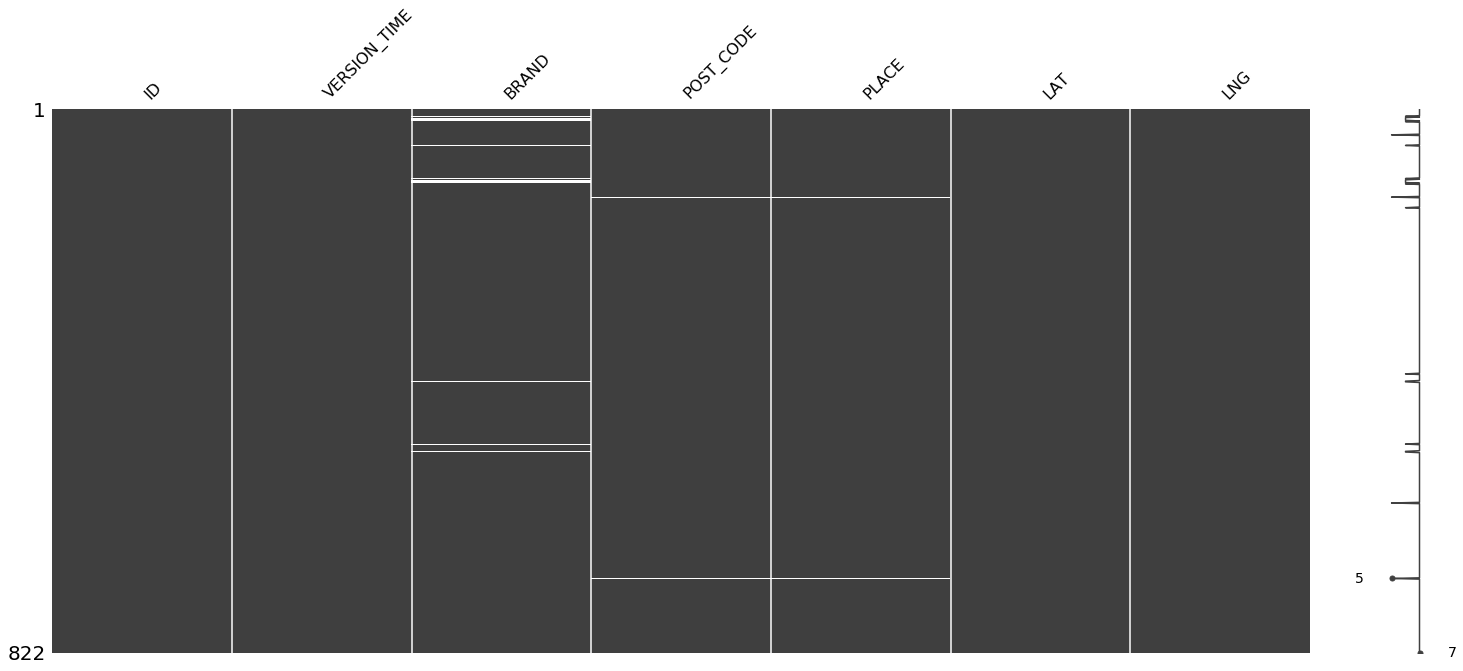

In [34]:
# Visualisation of missing entries
dataset_prices = pd.read_csv('example_sprit_cut_prices.csv',sep=';')
msno.matrix(dataset_Station);

In [35]:
# dataset_Prices.rename(columns={'STID':'ID'}, inplace=True)



In [36]:
dataset_Prices.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01.000000,1
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01.000000,21
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01.000000,21


In [37]:
dataset_Station.head()

,ID,VERSION_TIME,BRAND,POST_CODE,PLACE,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,2015-01-09 10:26:15.000000,ARAL,76139,Karlsruhe,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,2015-09-28 21:00:13.000000,JET,68169,MANNHEIM,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,2014-09-26 13:24:57.000000,ARAL,67663,Kaiserslautern,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,2015-09-28 21:00:13.000000,JET,67655,KAISERSLAUTERN,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,2015-09-28 21:00:13.000000,JET,76726,GERMERSHEIM,49.226800,8.374400


In [38]:
dataset_Station.rename(columns={'ID':'STID'}, inplace=True)

In [39]:
dataset_Station.head()

,STID,VERSION_TIME,BRAND,POST_CODE,PLACE,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,2015-01-09 10:26:15.000000,ARAL,76139,Karlsruhe,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,2015-09-28 21:00:13.000000,JET,68169,MANNHEIM,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,2014-09-26 13:24:57.000000,ARAL,67663,Kaiserslautern,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,2015-09-28 21:00:13.000000,JET,67655,KAISERSLAUTERN,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,2015-09-28 21:00:13.000000,JET,76726,GERMERSHEIM,49.226800,8.374400


In [40]:
Dataset_merged = pd.merge(dataset_Prices, dataset_Station, on="STID", how="outer", suffixes=("","_repeated"))

In [41]:
Dataset_merged.head(50)

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,VERSION_TIME,BRAND,POST_CODE,PLACE,LAT,LNG
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589.0,1549.0,1389.0,2014-10-02 05:22:01.000000,21.0,2015-04-27 12:00:03.000000,ESSO,67551,WORMS,49.633409,8.273847
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589.0,1549.0,1389.0,2014-10-02 05:22:01.000000,21.0,2015-04-27 12:00:03.000000,ESSO,67551,WORMS,49.633409,8.273847
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569.0,1529.0,1369.0,2014-10-02 05:26:01.000000,21.0,2015-04-27 12:00:03.000000,ESSO,67551,WORMS,49.633409,8.273847
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569.0,1529.0,1369.0,2014-10-02 05:26:01.000000,21.0,2015-04-27 12:00:03.000000,ESSO,67551,WORMS,49.633409,8.273847
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569.0,1529.0,1359.0,2014-10-02 09:06:01.000000,1.0,2015-04-27 12:00:03.000000,ESSO,67551,WORMS,49.633409,8.273847
5,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569.0,1529.0,1359.0,2014-10-02 09:06:01.000000,1.0,2015-04-27 12:00:03.000000,ESSO,67551,WORMS,49.633409,8.273847
6,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539.0,1499.0,1339.0,2014-10-03 12:14:01.000000,21.0,2015-04-27 12:00:03.000000,ESSO,67551,WORMS,49.633409,8.273847
7,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539.0,1499.0,1339.0,2014-10-03 12:14:01.000000,21.0,2015-04-27 12:00:03.000000,ESSO,67551,WORMS,49.633409,8.273847
8,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529.0,1489.0,1329.0,2014-10-03 14:14:01.000000,21.0,2015-04-27 12:00:03.000000,ESSO,67551,WORMS,49.633409,8.273847
9,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529.0,1489.0,1329.0,2014-10-03 14:14:01.000000,21.0,2015-04-27 12:00:03.000000,ESSO,67551,WORMS,49.633409,8.273847


In [42]:


Dataset_merged.columns


Index(['STID', 'E5', 'E10', 'DIESEL', 'DATE_CHANGED', 'CHANGED',
       'VERSION_TIME', 'BRAND', 'POST_CODE', 'PLACE', 'LAT', 'LNG'],
      dtype='object')

In [43]:
####1. How many different stations exist in the data set and what is the existing history in days (bar chart)?

In [44]:
Dataset_merged['DATE_CHANGED'] =pd.to_datetime(Dataset_merged.DATE_CHANGED)

In [45]:
#Making defferent columns from DATE_changed to extract different intities

Dataset_merged['YEAR'] = Dataset_merged.DATE_CHANGED.dt.year 
Dataset_merged['DAY'] =Dataset_merged.DATE_CHANGED.dt.dayofyear
Dataset_merged['WEEK'] =Dataset_merged.DATE_CHANGED.dt.weekofyear
Dataset_merged['MONTH'] =Dataset_merged.DATE_CHANGED.dt.month
Dataset_merged['HOUR'] =Dataset_merged.DATE_CHANGED.dt.hour
Dataset_merged['WEEKDAY'] =Dataset_merged.DATE_CHANGED.dt.dayofweek
Dataset_merged['WEEKDAYSTR']= Dataset_merged.DATE_CHANGED.dt.dayofweek
Dataset_merged['WEEKDAYSTR'] = Dataset_merged['WEEKDAYSTR'].apply(lambda sym: {0:'SUN',1:'MON','2':'TUE',3:'WED',4:'THU',5:'FRI',6:'SAT'}.get(sym, ' '))




In [46]:

Diff_stations = Dataset_merged.groupby(['STID','YEAR'])['DAY'].nunique()
Diff_stations = Diff_stations.groupby(['STID']).sum()
print(Diff_stations.count())
grouped_brand = Dataset_merged.groupby(['BRAND','YEAR'])['DAY'].nunique()
grouped_brand = grouped_brand.groupby(['BRAND']).sum()
print(grouped_brand.count())



400
53


In [47]:
Dataset_merged.head(50)

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,VERSION_TIME,BRAND,POST_CODE,PLACE,LAT,LNG,YEAR,DAY,WEEK,MONTH,HOUR,WEEKDAY,WEEKDAYSTR
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589.0,1549.0,1389.0,2014-10-02 05:22:01,21.0,2015-04-27 12:00:03.000000,ESSO,67551,WORMS,49.633409,8.273847,2014.0,275.0,40.0,10.0,5.0,3.0,WED
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589.0,1549.0,1389.0,2014-10-02 05:22:01,21.0,2015-04-27 12:00:03.000000,ESSO,67551,WORMS,49.633409,8.273847,2014.0,275.0,40.0,10.0,5.0,3.0,WED
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569.0,1529.0,1369.0,2014-10-02 05:26:01,21.0,2015-04-27 12:00:03.000000,ESSO,67551,WORMS,49.633409,8.273847,2014.0,275.0,40.0,10.0,5.0,3.0,WED
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569.0,1529.0,1369.0,2014-10-02 05:26:01,21.0,2015-04-27 12:00:03.000000,ESSO,67551,WORMS,49.633409,8.273847,2014.0,275.0,40.0,10.0,5.0,3.0,WED
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569.0,1529.0,1359.0,2014-10-02 09:06:01,1.0,2015-04-27 12:00:03.000000,ESSO,67551,WORMS,49.633409,8.273847,2014.0,275.0,40.0,10.0,9.0,3.0,WED
5,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569.0,1529.0,1359.0,2014-10-02 09:06:01,1.0,2015-04-27 12:00:03.000000,ESSO,67551,WORMS,49.633409,8.273847,2014.0,275.0,40.0,10.0,9.0,3.0,WED
6,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539.0,1499.0,1339.0,2014-10-03 12:14:01,21.0,2015-04-27 12:00:03.000000,ESSO,67551,WORMS,49.633409,8.273847,2014.0,276.0,40.0,10.0,12.0,4.0,THU
7,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539.0,1499.0,1339.0,2014-10-03 12:14:01,21.0,2015-04-27 12:00:03.000000,ESSO,67551,WORMS,49.633409,8.273847,2014.0,276.0,40.0,10.0,12.0,4.0,THU
8,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529.0,1489.0,1329.0,2014-10-03 14:14:01,21.0,2015-04-27 12:00:03.000000,ESSO,67551,WORMS,49.633409,8.273847,2014.0,276.0,40.0,10.0,14.0,4.0,THU
9,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529.0,1489.0,1329.0,2014-10-03 14:14:01,21.0,2015-04-27 12:00:03.000000,ESSO,67551,WORMS,49.633409,8.273847,2014.0,276.0,40.0,10.0,14.0,4.0,THU


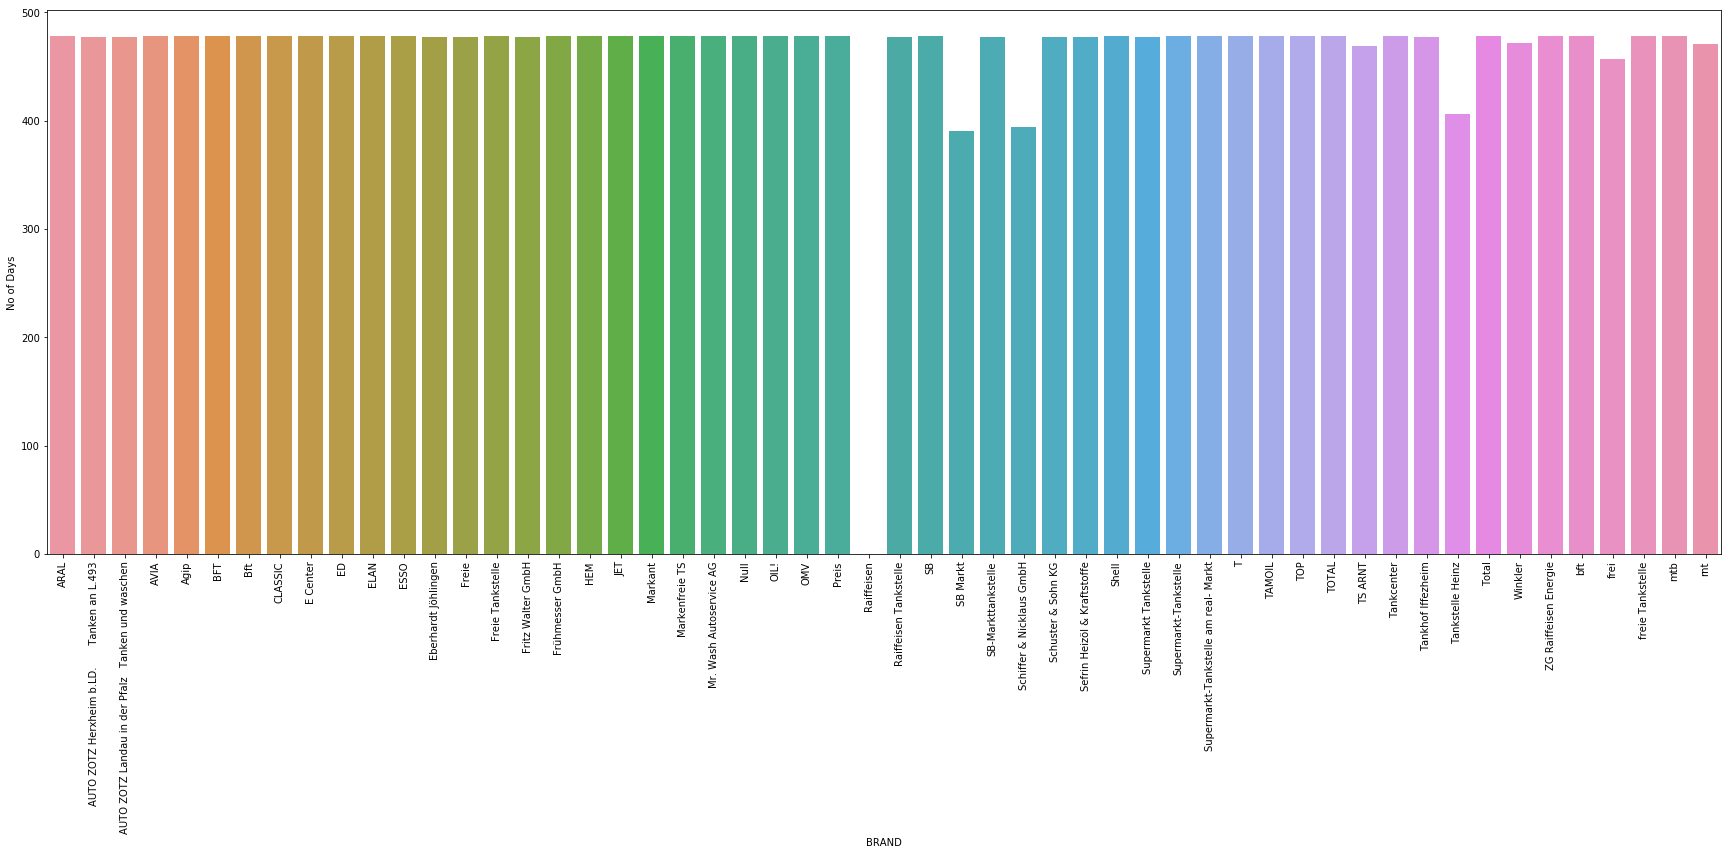

In [48]:
# The existing history
brand_existence = Dataset_merged.groupby('BRAND')['DATE_CHANGED']
brand_start=brand_existence.min().reset_index()
brand_end=brand_existence.max().reset_index()
# get brand history in days
brand_history = (pd.to_datetime(brand_end['DATE_CHANGED'])-pd.to_datetime(brand_start['DATE_CHANGED'])).dt.days
brand_end['No of Days'] = brand_history


dims = (30, 10)
fig, ax = plt.subplots(figsize=dims)
g = sns.barplot(ax=ax,x='BRAND',y='No of Days',data=brand_end);
# rotate labels
plt.setp(g.get_xticklabels(), rotation=90);


In [49]:
####2. What is the min, mean, max price for each gasoline type and station weekly (time series graph)?

In [50]:
Dataset_date_changed = Dataset_merged.DATE_CHANGED

def plot_fuel_stats(fuel_name):
    plt.figure(figsize=(20,5))
    plt.title('Prices of '+fuel_name)
    (Dataset_merged.groupby(Dataset_date_changed.dt.week)[fuel_name].max()).plot(label='Max')
    (Dataset_merged.groupby(Dataset_date_changed.dt.week)[fuel_name].mean()).plot(label='Mean')
    (Dataset_merged.groupby(Dataset_date_changed.dt.week)[fuel_name].min()).plot(label='Min')
    plt.legend(loc='upper right');
    plt.xlabel('Number of weeks');
    plt.ylabel('Price in Euro');
    

In [51]:
####What is cheapest station (in average) and why?

In [52]:
cheap_E5=Dataset_merged.groupby('BRAND')['E5'].min().sort_values().reset_index()
cheap_E10=Dataset_merged.groupby('BRAND')['E10'].min().sort_values().reset_index()
cheap_DIESEL=Dataset_merged.groupby('BRAND')['DIESEL'].min().sort_values().reset_index()



In [53]:
x=pd.merge(cheap_E5,cheap_E10)
cheapest_stations=pd.merge(x,cheap_DIESEL)
cheapest_stations['Mean']=cheapest_stations.mean(axis=1)

avg_min_price = cheapest_stations['Mean'].min()
avg_min_price_string = str("{0:.3f}".format((avg_min_price)))+' Euro'

min_index = cheapest_stations['Mean'].idxmin()
cheapest_brand = cheapest_stations.iloc[min_index]['BRAND']

display(Markdown('# The cheapest station in average is '+cheapest_brand+' since it offers all fuels at low price'))
display(Markdown('# The average price is '+avg_min_price_string))

# The cheapest station in average is Agip since it offers all fuels at low price

# The average price is 666.333 Euro

In [54]:
##4. At which day of a week is the price most likely the cheapest (week profile)?

# The cheapest price will be most likely on Saturday

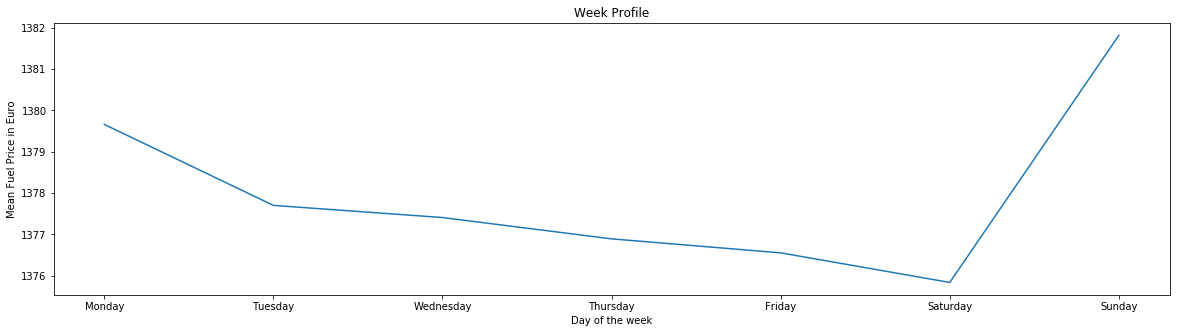

In [55]:
day_grouped = Dataset_merged.groupby(Dataset_merged.DATE_CHANGED.dt.day_name())['E5', 'E10','DIESEL'].mean()

day_grouped['Mean']=day_grouped.mean(axis=1)

# Reindex by day of week
day_grouped = day_grouped.groupby(['DATE_CHANGED']).sum().reindex(day_name[0:7]) 

plt.figure(figsize=(20,5))
plt.title('Week Profile')

min_index = day_grouped['Mean'].idxmin()
plt.plot(day_name[0:7], day_grouped['Mean'])

plt.xlabel('Day of the week');
plt.ylabel('Mean Fuel Price in Euro');

display(Markdown('# The cheapest price will be most likely on '+min_index))

In [56]:
####5. At which hour during a day is the price the cheapest in average (hour profile)?

# The cheapest price will be most likely at 18.0 Hours

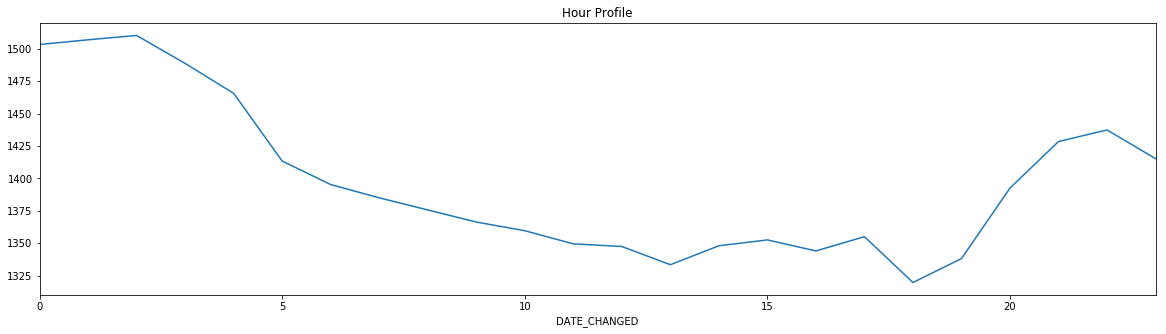

In [57]:
hour_grouped = Dataset_merged.groupby(Dataset_merged.DATE_CHANGED.dt.hour)['E5', 'E10','DIESEL'].mean()

hour_grouped['Mean']=hour_grouped.mean(axis=1)

plt.figure(figsize=(20,5))
plt.title('Hour Profile')

min_index = hour_grouped['Mean'].idxmin()
(hour_grouped['Mean']).plot();

display(Markdown('# The cheapest price will be most likely at '+str(min_index)+' Hours'))

In [58]:
####6. How many different station locations are present in the data (visualize via a map)?

In [59]:
tile_provider = get_provider(Vendors.CARTODBPOSITRON)

# South west of Germany bounds in web mercator coordinates
p = figure(x_range=(818793.446991, 1010373.869043), y_range=(6387689.579736,6282024.377476),
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(tile_provider)
                         
#coords_df.head()
merc_coords = []
for x,y in set(zip( Dataset_stations['LAT'].tolist(),Dataset_stations['LNG'].tolist())):
    merc_coords.append((transform(Proj(init='epsg:4326'), Proj(init='epsg:3857'), y, x))) # longitude first, latitude second.
lats = [x for (x,y) in merc_coords]
longs = [y for (x,y) in merc_coords]
p.circle(x = lats,
         y = longs,line_color="red", 
         fill_color="orange",
         fill_alpha=0.5)
show(p)

output_notebook()
display(Markdown('# There are '+str(len(merc_coords))+' different station locations'))

NameError: name 'get_provider' is not defined

In [ ]:
#####7. What is the gas station which has most price data points, choose one and draw the time series for all 3 gasoline types?

In [ ]:
BrandPrice=Dataset_merged[['BRAND','E5','E10','DIESEL','DATE_CHANGED']]
BrandData=BrandPrice.BRAND.value_counts()
BrandMostStation = BrandData.idxmax()
Dataset_mostbrands= BrandPrice[BrandPrice['BRAND']==BrandMostStations]
display(Markdown('# The gas station which has most price data points is '+BrandMostStation))


In [ ]:
plt.figure(figsize=(20,5))
plt.title('Weekly Profile of '+BrandMostStations)
Dataset_mostbrands.groupby(Dataset_mostbrands.DATE_CHANGED.dt.week).E5.mean().plot(xticks=range(1,53))
Dataset_mostbrands.groupby(Dataset_mostbrands.DATE_CHANGED.dt.week).E10.mean().plot(xticks=range(1,53))
Dataset_mostbrands.groupby(Dataset_mostbrands.DATE_CHANGED.dt.week).DIESEL.mean().plot(xticks=range(1,53))
plt.legend(loc='upper right')
plt.xlabel('Number of weeks')
plt.ylabel('Price in Euros');

In [ ]:
####8. At which hour during a day do we have the most price changes?

In [ ]:
e5_changes = (BrandPrice.groupby(BrandPrice.DATE_CHANGED.dt.hour))['E5', 'E10','DIESEL'].count()
e5_changes.plot(figsize=(20,5));
max_index = e5_changes.E5.idxmax()
max_num_changes = e5_changes.E5.max().mean()
display(Markdown('# The hour during the day we have the most price changes is at '+str(max_index)+' Hours with '+str(int(max_num_changes))+' changes'));

In [ ]:
####9. Select 20 gas stations having the longest time history and visualize the average price per month. Use heatmap and only the prices between 12:00-13:00 of e10 and diesel

In [ ]:
Brand_group = brand_end.groupby('No of Days')
max_idx = Brand_group['BRAND'].count().idxmax()
top_brand_list = (Brand_group.get_group(max_idx)['BRAND'][:20]).to_list()
top_brand_list

In [ ]:
Month_grouped= Dataset_merged.groupby(Dataset_merged.DATE_CHANGED.dt.month_name())['E10','DIESEL'].mean()
Month_grouped['Mean']=Month_grouped.mean(axis=1)
hour_grouped = Dataset_merged.groupby(Dataset_merged.DATE_CHANGED.dt.hour)['E10','DIESEL'].mean()
hour_grouped


In [ ]:
for brand in top_brand_list:
    merged_df_brand = Dataset_merged[Dataset_merged['BRAND']==brand]
    month_data = merged_df_brand.groupby(merged_df_brand.DATE_CHANGED.dt.month_name())['E10','DIESEL'].mean()

In [ ]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.heatmap(month_data, cbar_kws={'format': '%1.2f Euro'}, yticklabels=months);

In [ ]:
##10. Describe a possible business potential in € for the customer . Define the constraints of the business case 5 lines, the answer max 15 lines (high level summary)
Ans: The Business can be improved by making certain changes. Refueling at the cheapest station, here its HEM.
     The fuel is cheapest on saturday which will help the firm, to refill for their operations for the weekend and the rest of the week.
    We mostly consider the cost to be our main concern. Therefore, On a daily basis management can refill at 18:00 hours as its the cheapest.
    The firm should consider to have Diesel vehicles as price is lower than E5 and E10 fuels.
        

In [60]:
import unittest

In [61]:
def minimum_values(data):
    return data.min()


def maximum_values(data):
    return data.max()


def mean_values(data):
    return data.mean()

class TestTimeMethods(unittest.TestCase):
    def test_minimum_values(self):
        data_frame = {'col1': [1,5,0,-2,-6], 'col2': [4,6,0,-1,-9]}
        data = pd.DataFrame(data=data_frame)
        self.assertEqual(minimum_values(data["col1"]), -6)
        self.assertEqual(minimum_values(data["col2"]), -9)

    def test_mean_values(self):
        data_frame = {'col1': [0,0,0], 'col2': [-11,4,0]}
        data = pd.DataFrame(data=data_frame)
        self.assertEqual(mean_values(data["col1"]), 0)
        self.assertEqual(mean_values(data["col1"]), -9)

    def test_maximum_values(self):
        data_frame = {'col1': [1,0,4,11,8], 'col2': [5,7,0,-5,-6]}
        data = pd.DataFrame(data=data_frame)
        self.assertEqual(maximum_values(data["col1"]), 11)
        self.assertEqual(maximum_values(data["col2"]), 7)

unittest.main(argv=[''], verbosity=2, exit=False)


test_maximum_values (__main__.TestTimeMethods) ... ok
test_mean_values (__main__.TestTimeMethods) ... FAIL
test_minimum_values (__main__.TestTimeMethods) ... ok

FAIL: test_mean_values (__main__.TestTimeMethods)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-61-8761a44c30dc>", line 23, in test_mean_values
    self.assertEqual(mean_values(data["col1"]), -9)
AssertionError: 0.0 != -9

----------------------------------------------------------------------
Ran 3 tests in 4.032s

FAILED (failures=1)
